# Ejercicio 1 Capitulo 3

diego.herrerag00@uc.cl

## Misión 1: Completando información

In [1]:

import pandas as pd

df = pd.read_csv('E1_datos.csv')
df.head()


,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
df.shape # Vemos el tamaño del data frame, de la forma: (n_filas, n_columnas)

(344, 8)

In [3]:
# Vemos si existen valores nulos
df.isna().sum()

Unnamed: 0            0
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm    36
body_mass_g           2
sex                  10
dtype: int64

Dado que existen valores nulos, los reemplazamos cada uno por la media de los valores de cada columna numerica. Para las columnas con valores no númericos, o bien, con valores categoricos, los descartaremos.

In [4]:
df.dropna(subset=['sex'], inplace=True) #esto es para descartar los valores nulos de la columna sex. Con inplace=True, se modifica el dataframe original.
df.isna().sum()


Unnamed: 0            0
species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm    33
body_mass_g           0
sex                   0
dtype: int64

Luego de descartar todos los datos que tenían valores nulos en la categoría de `sex`, solo quedaron 33 valores nulos, todos de la columna `flipper_length_mm`

In [5]:
flipper_length = df['flipper_length_mm']

valormedio = flipper_length.mean()

for valor in flipper_length:
    if pd.isna(valor):
        df['flipper_length_mm'] = df['flipper_length_mm'].replace(valor, valormedio)
        

df['flipper_length_mm'].isna().sum()


0

In [6]:
df.isna().sum()

Unnamed: 0           0
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df.shape # Vemos el tamaño del data frame, de la forma: (n_filas, n_columnas)

(334, 8)

De tener 344 datos, ahora al limpiar el datafram quedamos en 334 dato. 

## Misión 2: Preparación de los datos
Primero que todo, prepararemos los datos antes de entrenar modelos, usando métodos de `sklearn`. En particular, dado que se requieren de valores numericos para el entrenamiento, codificaremos aquellos categoricos, como los de la columna `species`, `island` y `sex`, usaen valores binarios usando el metodo de `OneHotEncoder`. 

Dado que estas codificaciones son en realidad transformaciones, se deben organizar con `ColumnTransformer`. Posteriormente, dividimos el dataset en entrenamiento y prueba con `train_test_split`, estratificando por `species`, que es el vector `target` en cuestión. 


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

valores_numericos = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
valores_categoricos = ['island','sex']

y = df['species'] # Aquí definimos el vector target
X = df[valores_numericos + valores_categoricos] # Aquí definimos la matríz de categorías, donde la idea es no incluir el vector target de la columna "species". 


# Usaremos StandardScaler para escalar las columnas numéricas a media 0 y desviación 1.
# Esto ayuda a modelos sensibles a la escala, evitando tambiénj al ir en un Pipeline evitamos data leakage.


# Definimos un transformador por columnas: escala numéricas y codifica categóricas.
    
preprocesamiento = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(StandardScaler()), valores_numericos),
        ('cat', make_pipeline(OneHotEncoder()), valores_categoricos)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  
print(f"Tamaño de Matriz de entrenamiento: {X_train.shape}.\nTamaño de Matriz de prueba: {X_test.shape}")


Tamaño de Matriz de entrenamiento: (267, 6).
Tamaño de Matriz de prueba: (67, 6)


## Misión 3: Análisis exploratorio visual


In [9]:
# Misión 3: reducción de dimensionalidad y visualización
from sklearn.decomposition import PCA

# 1) Obtener la matriz numérica con el mismo preprocesamiento
X_preprocesada = preprocesamiento.fit_transform(X)  # para exploración usamos todo el dataset
categorias = y.astype('category').cat.categories
y_codificada = y.astype('category').cat.codes

In [10]:
# 2) PCA a 2D
pca2 = PCA(n_components=2, random_state=42)
Z_pca2 = pca2.fit_transform(X_preprocesada)

Z_pca2

array([[-1.84719545e+00,  4.36988074e-01],
       [-1.47612295e+00, -7.16726989e-01],
       [-1.53146896e+00, -5.21939804e-01],
       [-2.01370193e+00, -3.29886343e-01],
       [-1.89954027e+00,  1.10062384e+00],
       [-1.92557511e+00, -6.60335963e-01],
       [-8.13063180e-01,  9.15716827e-01],
       [-1.96085086e+00, -6.21177997e-01],
       [-1.92886417e+00,  1.27616759e+00],
       [-1.52703493e+00,  1.03060520e+00],
       [-1.88920753e+00, -8.23835527e-01],
       [-1.71664164e+00, -2.73310340e-01],
       [-8.06695749e-01,  1.52726161e+00],
       [-2.47262766e+00, -8.50207431e-01],
       [-1.01674230e+00,  2.02560822e+00],
       [-2.27659134e+00, -7.90884650e-01],
       [-1.82566960e+00,  1.30912500e-01],
       [-1.71179360e+00, -5.49364497e-01],
       [-1.22667088e+00,  2.52918832e-02],
       [-1.31145223e+00, -2.66231330e-01],
       [-1.78238257e+00, -7.01944704e-01],
       [-1.49010314e+00,  3.20212768e-01],
       [-1.58682693e+00, -7.30426761e-01],
       [-2.

Una vez visto el PCA, procesamos a visualizar los datos en 2D

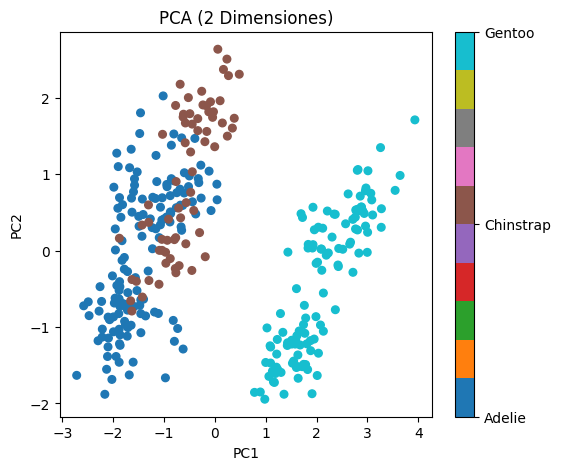

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
scatter = plt.scatter(Z_pca2[:,0], Z_pca2[:,1], c=y_codificada, cmap='tab10', s=30)
color_bar = plt.colorbar(scatter, ticks=range(len(categorias)))
color_bar.set_ticklabels(categorias)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (2 Dimensiones)')
plt.show()

Alternativa para reducirlo a 2 dimensiones: t-SNE. Es un metodo más lento.

In [12]:
from sklearn.manifold import TSNE

tsne2 = TSNE(n_components=2, perplexity=30, init='pca', random_state=42, learning_rate='auto')
Z_tsne2 = tsne2.fit_transform(X_preprocesada)
Z_tsne2

array([[ -1.932939  ,  12.15201   ],
       [ -5.8363814 , -10.063184  ],
       [ -5.03464   ,  -9.657067  ],
       [ -4.386322  ,  -8.609974  ],
       [ -0.8462963 ,  12.719223  ],
       [ -6.259301  , -10.1187935 ],
       [ -1.3748453 ,  14.377481  ],
       [ -6.591384  , -10.259443  ],
       [ -0.5385026 ,  12.820441  ],
       [ -0.07301833,  13.549224  ],
       [ -5.5140004 ,  -8.677801  ],
       [ -4.446913  ,  -9.06907   ],
       [ -1.2628384 ,  14.935486  ],
       [ -5.3529186 ,  -7.95683   ],
       [ -1.0440352 ,  15.364044  ],
       [ -6.0914044 ,  -2.441429  ],
       [ -3.2039545 ,   6.3431287 ],
       [ -3.965918  ,  -1.7111706 ],
       [ -3.0541146 ,   6.7706213 ],
       [ -3.547724  ,   6.346901  ],
       [ -4.057633  ,  -1.8473583 ],
       [ -3.2088752 ,   6.776765  ],
       [ -4.5845895 ,  -3.6534755 ],
       [ -6.178855  ,  -2.4111683 ],
       [ -2.9281595 ,   6.594668  ],
       [-13.563102  ,  -5.1770706 ],
       [ -7.553708  ,   8.888478  ],
 

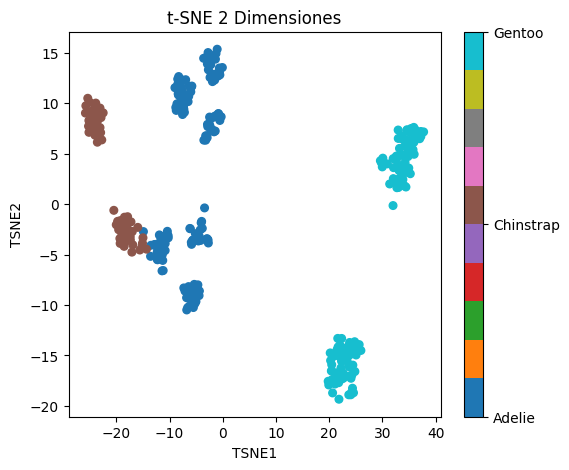

In [13]:
plt.figure(figsize=(6,5))
scatter = plt.scatter(Z_tsne2[:,0], Z_tsne2[:,1], c=y_codificada, cmap='tab10', s=30)
barra_colores = plt.colorbar(scatter, ticks=range(len(categorias)))
barra_colores.set_ticklabels(categorias)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('t-SNE 2 Dimensiones')
plt.show()

## Compare los métodos. 

## Misión 4: Análisis de clusters

In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Construimos la matríz de características completa con el mismo preprocesamiento
X_completo = preprocesamiento.fit_transform(X)

# Usamos el PCA para reducir la dimensionalidad a 2D, y así visualizar la matríz completa
pca_vis = PCA(n_components=2, random_state=42)
X_completo_2d = pca_vis.fit_transform(X_completo)

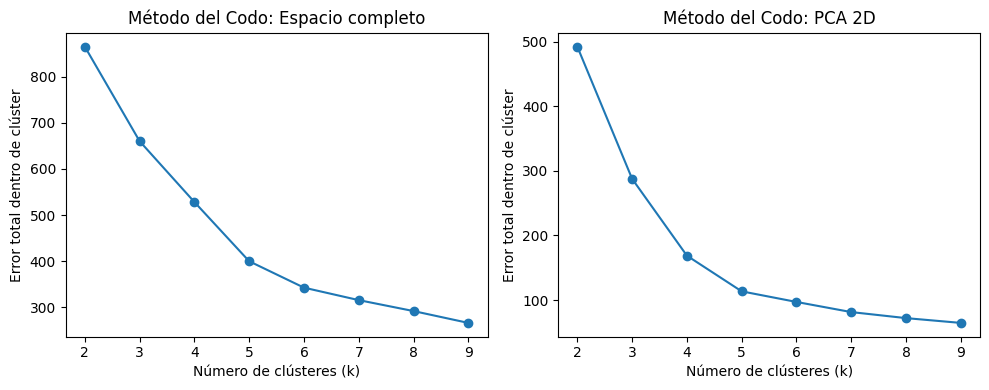

In [15]:
numeros_de_clusters = range(2, 10)
error_total_completo = []
error_total_reducido = []

for cantidad_k in numeros_de_clusters:
    
    kmeans_completo_tmp = KMeans(n_clusters=cantidad_k, n_init=10, random_state=42).fit(X_completo) # KMeans en el espacio completo
    
    kmeans_reducido_tmp = KMeans(n_clusters=cantidad_k, n_init=10, random_state=42).fit(X_completo_2d) # KMeans en el espacio reducido (PCA 2D)
    error_total_completo.append(kmeans_completo_tmp.inertia_)
    error_total_reducido.append(kmeans_reducido_tmp.inertia_)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(list(numeros_de_clusters), error_total_completo, marker='o')
ax[0].set_title('Método del Codo: Espacio completo')
ax[0].set_xlabel('Número de clústeres (k)')
ax[0].set_ylabel('Error total dentro de clúster')
ax[1].plot(list(numeros_de_clusters), error_total_reducido, marker='o')
ax[1].set_title('Método del Codo: PCA 2D')
ax[1].set_xlabel('Número de clústeres (k)')
ax[1].set_ylabel('Error total dentro de clúster')
plt.tight_layout()
plt.show()

In [16]:
k_optimo = 3 # Acá elegimos el número de clusters óptimos, que es 3, ya que es un numero razonable para
             # la posible cantidad de clústers que hayan

kmeans_completo = KMeans(n_clusters=k_optimo, n_init=10, random_state=42)
clusters_completo = kmeans_completo.fit_predict(X_completo)

kmeans_reducido = KMeans(n_clusters=k_optimo, n_init=10, random_state=42)
clusters_reducido = kmeans_reducido.fit_predict(X_completo_2d)

Vamos a visualizar los clusters, cada uno de los grupos con su centroide respectivo, figurado como una "x". 

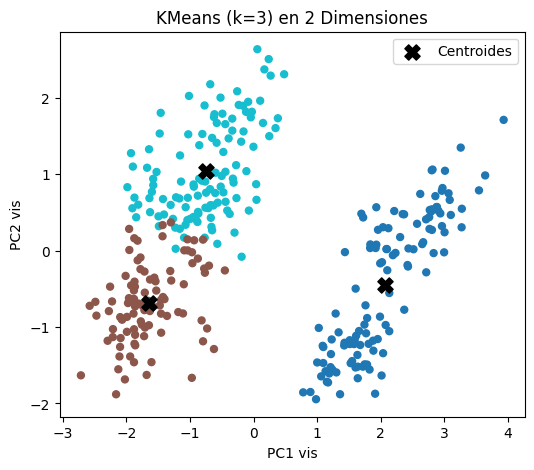

In [17]:

centroides_completo_2d = pca_vis.transform(kmeans_completo.cluster_centers_)
plt.figure(figsize=(6,5))
plt.scatter(X_completo_2d[:,0], X_completo_2d[:,1], c=clusters_completo, cmap='tab10', s=25)
plt.scatter(centroides_completo_2d[:,0], centroides_completo_2d[:,1], c='black', s=120, marker='X', label='Centroides')
plt.title(f'KMeans (k={k_optimo}) en 2 Dimensiones')
plt.legend(); plt.xlabel('PC1 vis'); plt.ylabel('PC2 vis'); plt.show()

Ahora relacionaremos los clusters con las targets verdaderos con el fin de interpretar los clusters.

In [18]:
y_categorias = y.astype('category')
tabla_especie_por_cluster_completo = pd.crosstab(y_categorias, clusters_completo, rownames=['species'], colnames=['cluster_full'])
tabla_especie_por_cluster_pca = pd.crosstab(y_categorias, clusters_reducido, rownames=['species'], colnames=['cluster_pca'])

print('Tabla especie vs cluster (espacio completo):')
print(tabla_especie_por_cluster_completo)
print('\nTabla especie vs cluster (PCA 2D):')
print(tabla_especie_por_cluster_pca)

Tabla especie vs cluster (espacio completo):
cluster_full    0   1   2
species                  
Adelie          0  76  70
Chinstrap       0  22  46
Gentoo        120   0   0

Tabla especie vs cluster (PCA 2D):
cluster_pca   0    1   2
species                 
Adelie       78    0  68
Chinstrap    16    0  52
Gentoo        0  120   0


## Misión 5: Predicción de la especie

### Predicción Tradicional

Entrenaremos dos modelos de clasificación: `LogisticRegression` y `RandomForest`. Aplicaremos el preprocesamiento de forma explícita (escalado de numéricas y codificación one-hot de categóricas) usando únicamente el conjunto de entrenamiento, y luego entrenaremos los modelos sobre la matriz resultante. Finalmente, evaluaremos con `accuracy`, que indica la proporción de predicciones correctas sobre el total de casos evaluados.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

clasificadores = {
    'Regresion_logistica': LogisticRegression(max_iter=200),
    'RandomForest': RandomForestClassifier(n_estimators=300, random_state=42)
}

# Preprocesamiento explícito en entrenamiento y aplicación en prueba
escalador = StandardScaler().fit(X_train[valores_numericos])
X_train_numerico = escalador.transform(X_train[valores_numericos])
X_test_numerico = escalador.transform(X_test[valores_numericos])

codificador = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(X_train[valores_categoricos])
X_entrenamiento_categorico = codificador.transform(X_train[valores_categoricos])
X_prueba_categorico = codificador.transform(X_test[valores_categoricos])

X_entrenamiento = np.hstack([X_train_numerico, X_entrenamiento_categorico])
X_prueba = np.hstack([X_test_numerico, X_prueba_categorico])

resultados = {}
for nombre_clasificador, clasificador in clasificadores.items():
    clasificador.fit(X_entrenamiento, y_train)
    y_predicho = clasificador.predict(X_prueba)
    exactitud = accuracy_score(y_test, y_predicho)
    resultados[nombre_clasificador] = (exactitud, clasificador, y_predicho)
    print(f"{nombre_clasificador} - exactitud: {round(exactitud, 3)}")

Regresion_logistica - exactitud: 0.985
RandomForest - exactitud: 1.0


In [20]:
mejor_modelo_nombre = None
mejor_exactitud = -1.0
mejor_clasificador = None
mejor_prediccion = None
for nombre, (exactitud, clasificador, y_predicho) in resultados.items():
    if exactitud > mejor_exactitud:
        mejor_modelo_nombre = nombre
        mejor_exactitud = exactitud
        mejor_clasificador = clasificador
        mejor_prediccion = y_predicho
print(f"\nMejor modelo: {mejor_modelo_nombre} (exactitud={round(mejor_exactitud, 3)})")


Mejor modelo: RandomForest (exactitud=1.0)


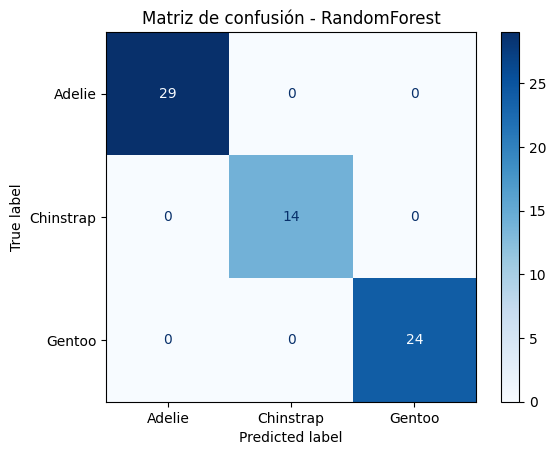

In [21]:
matriz_confusion = confusion_matrix(y_test, mejor_prediccion, labels=sorted(y.unique()))
visual_matriz = ConfusionMatrixDisplay(matriz_confusion, display_labels=sorted(y.unique()))
visual_matriz.plot(cmap='Blues')
plt.title(f'Matriz de confusión - {mejor_modelo_nombre}')
plt.show()

In [22]:
print('\nReporte de clasificación:')
print(classification_report(y_test, mejor_prediccion))


Reporte de clasificación:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [23]:
# Ahora, veremos los posibles especies que podrían tener los pinguinos, algo útil para la predicción.

print(df['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


### Predicción Jerarquica

Entrenaremos dos modelos: primero, un modelo binario que detecta si un pingüino es `Gentoo` o no, aplicando el mismo preprocesamiento manual (escalado/codificación) aprendido solo con el conjunto de entrenamiento. Luego, con los casos que no son `Gentoo`, entrenaremos un segundo modelo que distingue entre `Adelie` y `Chinstrap`. Finalmente, evaluaremos el rendimiento de ambos con `accuracy` y el reporte de clasificación, comparándolo con la predicción tradicional.

Una vez ya entrenados los modelos, procederemos a ejecutar las predicciones de ambos y evaluar como fueron con métricas.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

# Primero defino las columnas que voy a usar: numéricas y categóricas
columnas_numericas = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
columnas_categoricas = ['island','sex']

# Acá obtengo los valores únicos de las columnas categóricas, porque luego los voy a necesitar para el OneHotEncoder
valores_isla = sorted(X['island'].unique())
valores_sexo = sorted(X['sex'].unique())

In [25]:
# Alinear DataFrames a los índices de train/test (por si X_train/X_test se volvieron arrays)
X_train_df = X.loc[y_train.index]
X_test_df = X.loc[y_test.index]

# Imputación numérica (train) y escalado
imputador_numerico_h = SimpleImputer(strategy='mean').fit(X_train_df[columnas_numericas])
X_train_num_imp = imputador_numerico_h.transform(X_train_df[columnas_numericas])
escalador_h = StandardScaler().fit(X_train_num_imp)
X_train_num_escalado = escalador_h.transform(X_train_num_imp)

# Imputación y codificación categórica (train)
imputador_categorico_h = SimpleImputer(strategy='most_frequent').fit(X_train_df[columnas_categoricas])
X_train_cat_imp = imputador_categorico_h.transform(X_train_df[columnas_categoricas])
codificador_h = OneHotEncoder(
    categories=[valores_isla, valores_sexo],
    handle_unknown='ignore',
    sparse_output=False
).fit(X_train_cat_imp)
X_train_cat_codificado = codificador_h.transform(X_train_cat_imp)

# Matriz final de entrenamiento
X_entrenamiento_transformado = np.hstack([X_train_num_escalado, X_train_cat_codificado])

In [26]:
# Acá convierto el target a binario: 1 si es Gentoo, 0 si no lo es
y_binaria_gentoo_entrenamiento = y_train.apply(lambda x: 1 if x == 'Gentoo' else 0)

# Entreno un modelo de regresión logística para distinguir Gentoo de no-Gentoo
modelo_binario_gentoo = LogisticRegression(random_state=42)
modelo_binario_gentoo.fit(X_entrenamiento_transformado, y_binaria_gentoo_entrenamiento)

LogisticRegression(random_state=42)

In [27]:
# Imputamos y escalamos numéricas
X_test_num_imp = imputador_numerico_h.transform(X_test_df[columnas_numericas])
X_test_num_escalado = escalador_h.transform(X_test_num_imp)

# Imputamos y codificamos categóricas
X_test_cat_imp = imputador_categorico_h.transform(X_test_df[columnas_categoricas])
X_test_cat_codificado = codificador_h.transform(X_test_cat_imp)

# Junto numéricas y categóricas procesadas
X_prueba_transformado = np.hstack([X_test_num_escalado, X_test_cat_codificado])

In [28]:
# Acá obtenemos la predicción: 1 si el pingüino es Gentoo, 0 si no lo es
prediccion_gentoo_binaria = modelo_binario_gentoo.predict(X_prueba_transformado)

In [29]:
# Nos quedamos solo con los datos de entrenamiento que NO son Gentoo
X_train_no_gentoo = X_train_df[y_train != 'Gentoo']
y_train_no_gentoo = y_train[y_train != 'Gentoo']

# Aplico el mismo preprocesamiento a este subconjunto
X_train_no_gentoo_num = escalador_h.transform(imputador_numerico_h.transform(X_train_no_gentoo[columnas_numericas]))
X_train_no_gentoo_cat = codificador_h.transform(imputador_categorico_h.transform(X_train_no_gentoo[columnas_categoricas]))

# Junto todo en una matriz lista para el modelo
X_entrenamiento_no_gentoo = np.hstack([X_train_no_gentoo_num, X_train_no_gentoo_cat])

# Entreno otro modelo de regresión logística, esta vez para separar Adelie de Chinstrap
modelo_no_gentoo = LogisticRegression(random_state=42)
modelo_no_gentoo.fit(X_entrenamiento_no_gentoo, y_train_no_gentoo)


LogisticRegression(random_state=42)

In [30]:
# Acá seleccionamos sólo los pingüinos que fueron clasificados como no-Gentoo en la primera etapa
X_test_no_gentoo = X_test_df[prediccion_gentoo_binaria == 0]

# Los transformo igual que antes
X_test_no_gentoo_num = escalador_h.transform(imputador_numerico_h.transform(X_test_no_gentoo[columnas_numericas]))
X_test_no_gentoo_cat = codificador_h.transform(imputador_categorico_h.transform(X_test_no_gentoo[columnas_categoricas]))
X_prueba_no_gentoo = np.hstack([X_test_no_gentoo_num, X_test_no_gentoo_cat])

# Hago la predicción Adelie vs Chinstrap
prediccion_no_gentoo_especie = modelo_no_gentoo.predict(X_prueba_no_gentoo)


In [31]:
# Primero marcamos todos los Gentoo y "Non-Gentoo"
prediccion_jerarquica = np.array(['Gentoo' if pred == 1 else 'Non-Gentoo' for pred in prediccion_gentoo_binaria], dtype=object)

# Luego reemplazamos los "Non-Gentoo" con Adelie o Chinstrap según la predicción del segundo modelo
indices_no_gentoo = np.where(prediccion_gentoo_binaria == 0)[0]
for i, idx in enumerate(indices_no_gentoo):
    prediccion_jerarquica[idx] = prediccion_no_gentoo_especie[i]

# Calculamos F1 y AUC
exactitud_jerarquica = accuracy_score(y_test, prediccion_jerarquica)
f1_jerarquico = f1_score(y_test, prediccion_jerarquica, average='weighted')
roc_auc_jerarquico = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(prediccion_jerarquica), multi_class='ovr')

print(f'Exactitud del modelo jerárquico: {exactitud_jerarquica}')
print(f'F1 Score del modelo jerárquico: {f1_jerarquico}')
print(f'ROC AUC del modelo jerárquico: {roc_auc_jerarquico}')

Exactitud del modelo jerárquico: 1.0
F1 Score del modelo jerárquico: 1.0
ROC AUC del modelo jerárquico: 1.0


In [32]:
# Matríz de confusión y reporte de clasificación
matriz_confusion_jerarquica = confusion_matrix(y_test, prediccion_jerarquica)
print(f'Matriz de confusión del modelo jerárquico:\n {matriz_confusion_jerarquica}')
print('Reporte de clasificación del modelo jerárquico:')
print(classification_report(y_test, prediccion_jerarquica))

Matriz de confusión del modelo jerárquico:
 [[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
Reporte de clasificación del modelo jerárquico:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

